# Interval Weight Correlation Analysis

This notebook analyzes the correlations between interval weights and various musical characteristics found in Monte Carlo simulations of the pitch class rules engine. It visualizes how emphasizing different intervals affects the generated musical sequences.

## Setup

First, import the required libraries and set up the environment.

In [1]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import sys

# Add the parent directory to path to allow imports
sys.path.insert(0, str(Path.cwd().parent))

# Set plot styling
plt.style.use('ggplot')
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

## Load Correlation Data

Load the weight correlation data generated by a Monte Carlo simulation. If you don't have this file yet, you can create it by running a Monte Carlo simulation with the `--correlation-report` flag.

In [3]:
# Define the path to the correlation report
CORRELATION_FILE = Path.cwd() / 'weight_correlation.json'

# Check if file exists
if not CORRELATION_FILE.exists():
    print(f"Warning: {CORRELATION_FILE} not found. You may need to run a Monte Carlo simulation first.")
    print("Example command: python monte_carlo.py --num-simulations 100 --random-weights --correlation-report")
else:
    print(f"Loading correlation data from {CORRELATION_FILE}")

# Load the data
with open(CORRELATION_FILE, 'r') as f:
    correlation_data = json.load(f)

# Display structure
print("\nData structure:")
for section in correlation_data:
    print(f"- {section} contains correlations for {len(correlation_data[section])} musical metrics")

Loading correlation data from /Users/finchmf/coding/control_vectors/pc_rules_engine/analysis/weight_correlation.json

Data structure:
- melodic contains correlations for 6 musical metrics
- chordal contains correlations for 5 musical metrics


## Melodic Correlations Visualization

Create a heatmap showing how different interval weights correlate with various characteristics of melodic sequences.

Saved visualization to melodic_correlations.png


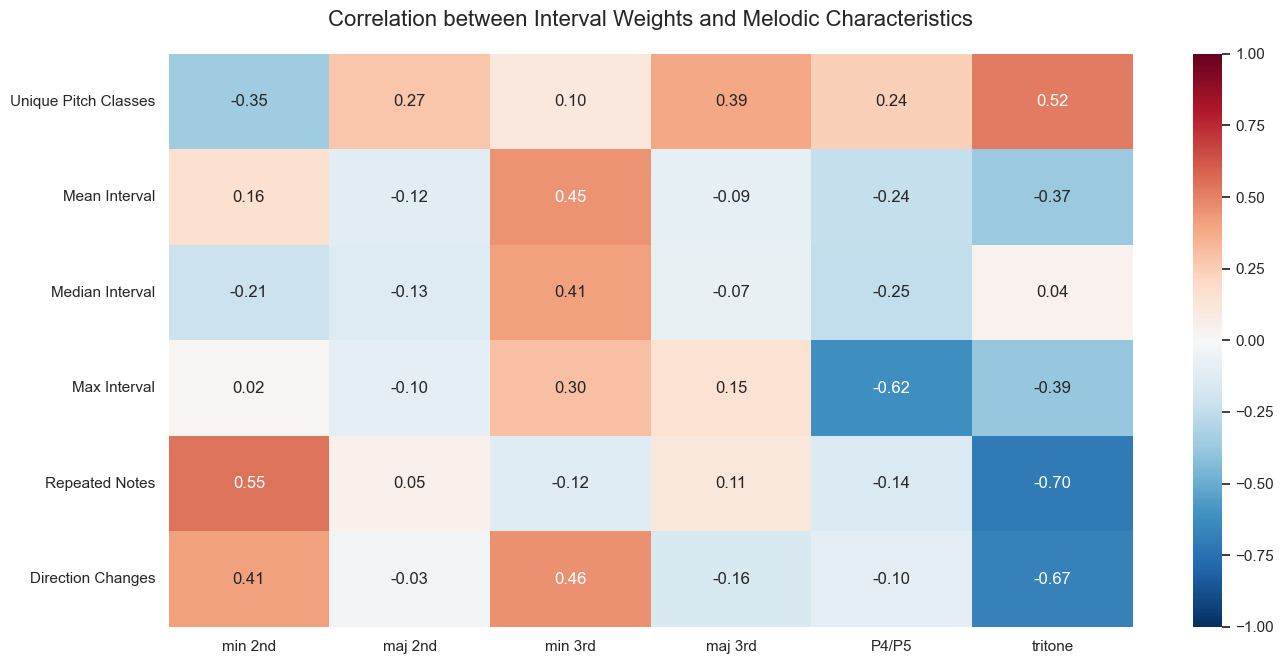

In [4]:
def create_correlation_heatmap(data, section_name, cmap='RdBu_r'):
    """Create a heatmap visualization of correlation data."""
    section_data = data[section_name]
    
    # Convert to a matrix for heatmap
    metrics = list(section_data.keys())
    intervals = [f"interval_{i}" for i in range(1, 7)]
    
    matrix = []
    for metric in metrics:
        row = [section_data[metric][interval] for interval in intervals]
        matrix.append(row)
    
    # Create a DataFrame for better labeling
    interval_labels = ['min 2nd', 'maj 2nd', 'min 3rd', 'maj 3rd', 'P4/P5', 'tritone']
    df = pd.DataFrame(matrix, index=metrics, columns=interval_labels)
    
    # Create the heatmap
    plt.figure(figsize=(14, len(metrics) * 0.8 + 2))
    ax = sns.heatmap(
        df,
        annot=True,
        cmap=cmap,
        vmin=-1.0,
        vmax=1.0,
        center=0,
        fmt=".2f"
    )
    
    # Improve text formatting
    metric_labels = [m.replace('_', ' ').title() for m in metrics]
    ax.set_yticklabels(metric_labels, rotation=0)
    
    plt.title(f"Correlation between Interval Weights and {section_name.title()} Characteristics", 
              fontsize=16, pad=20)
    plt.tight_layout()
    
    # Save the figure
    output_file = f"{section_name}_correlations.png"
    plt.savefig(output_file, dpi=300, bbox_inches='tight')
    print(f"Saved visualization to {output_file}")
    
    return df

# Create the melodic correlations heatmap
melodic_df = create_correlation_heatmap(correlation_data, 'melodic')

### Analysis of Melodic Correlations

Let's interpret key findings from the melodic correlations:

In [5]:
def find_strongest_correlations(df, threshold=0.4):
    """Find the strongest correlations (both positive and negative)."""
    # Flatten the dataframe to a series
    flat = df.unstack()
    
    # Get positive correlations
    positive = flat[flat > threshold].sort_values(ascending=False)
    negative = flat[flat < -threshold].sort_values()
    
    print(f"Strongest positive correlations (> {threshold}):")
    for (metric, interval), value in positive.items():
        print(f"  {interval} → {metric}: {value:.3f}")
    
    print(f"\nStrongest negative correlations (< -{threshold}):")
    for (metric, interval), value in negative.items():
        print(f"  {interval} → {metric}: {value:.3f}")

# Find strongest melodic correlations
find_strongest_correlations(melodic_df, threshold=0.4)

Strongest positive correlations (> 0.4):
  repeated_notes → min 2nd: 0.546
  unique_pitch_classes → tritone: 0.518
  direction_changes → min 3rd: 0.457
  mean_interval → min 3rd: 0.447
  direction_changes → min 2nd: 0.410
  median_interval → min 3rd: 0.410

Strongest negative correlations (< -0.4):
  repeated_notes → tritone: -0.705
  direction_changes → tritone: -0.674
  max_interval → P4/P5: -0.618


## Chordal Correlations Visualization

Create a heatmap for chordal sequence characteristics.

Saved visualization to chordal_correlations.png
Strongest positive correlations (> 0.3):
  consonance_change → maj 2nd: 0.380
  dissonance_change → min 3rd: 0.373

Strongest negative correlations (< -0.3):
  mean_pc_changes → maj 3rd: -0.443
  unique_chords → maj 3rd: -0.368
  dissonance_change → maj 3rd: -0.347


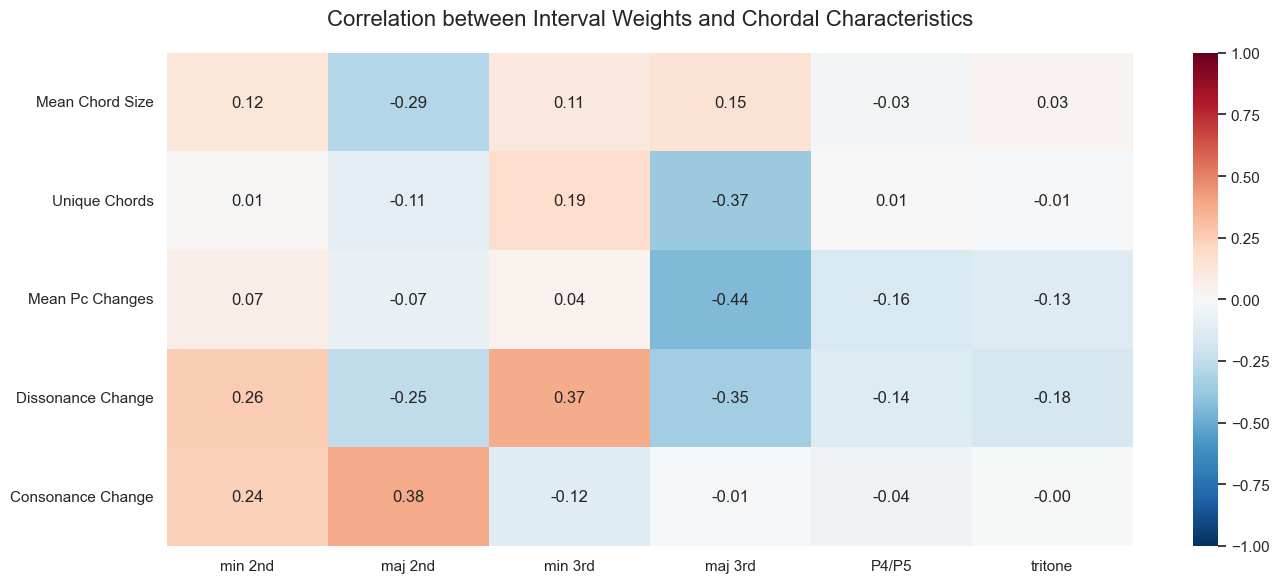

In [6]:
# Create the chordal correlations heatmap
chordal_df = create_correlation_heatmap(correlation_data, 'chordal')

# Find strongest chordal correlations
find_strongest_correlations(chordal_df, threshold=0.3)

## Analyzing Correlation Patterns

Let's look at how specific intervals tend to affect overall musical characteristics.

,Melodic Impact,Melodic Abs Impact,Chordal Impact,Chordal Abs Impact,Overall Impact
min 3rd,0.266287,0.266287,0.118056,0.118056,0.192172
tritone,-0.263216,0.263216,-0.057698,0.057698,0.160457
maj 3rd,0.055844,0.055844,-0.203644,0.203644,0.129744
P4/P5,-0.185725,0.185725,-0.073144,0.073144,0.129434
min 2nd,0.095189,0.095189,0.139294,0.139294,0.117241
maj 2nd,-0.006796,0.006796,-0.069358,0.069358,0.038077


<Figure size 1400x800 with 0 Axes>

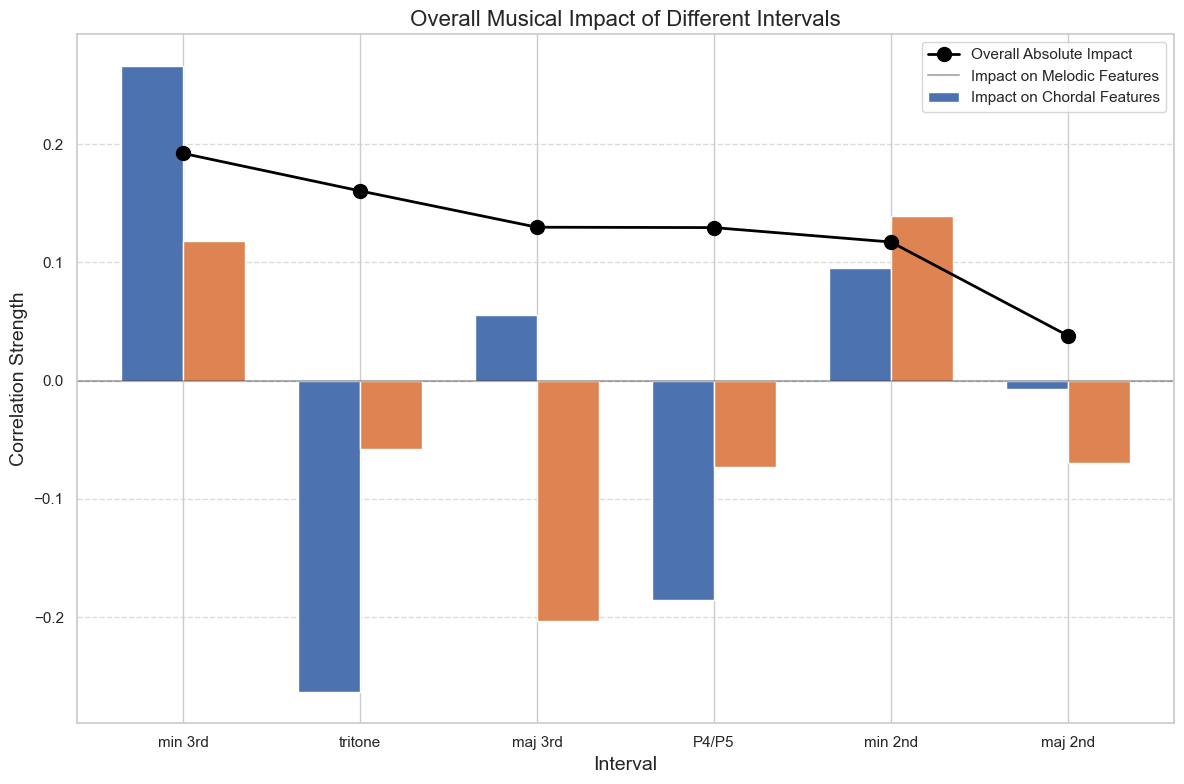

In [7]:
def analyze_interval_impact(melodic_df, chordal_df):
    """Analyze the overall impact of each interval across both melodic and chordal contexts."""
    # Combine dataframes
    melodic_means = melodic_df.mean().abs()
    chordal_means = chordal_df.mean().abs()
    
    # Create a comparison dataframe
    comparison = pd.DataFrame({
        'Melodic Impact': melodic_df.mean(),
        'Melodic Abs Impact': melodic_means,
        'Chordal Impact': chordal_df.mean(),
        'Chordal Abs Impact': chordal_means,
        'Overall Impact': (melodic_means + chordal_means) / 2
    })
    
    # Sort by overall impact
    comparison = comparison.sort_values('Overall Impact', ascending=False)
    
    # Plot the results
    plt.figure(figsize=(14, 8))
    ax = comparison[['Melodic Impact', 'Chordal Impact']].plot(kind='bar', width=0.7)
    
    # Add a line for the absolute impact
    comparison['Overall Impact'].plot(kind='line', marker='o', color='black', 
                                    linewidth=2, markersize=10, ax=ax)
    
    plt.title('Overall Musical Impact of Different Intervals', fontsize=16)
    plt.xlabel('Interval', fontsize=14)
    plt.ylabel('Correlation Strength', fontsize=14)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)
    plt.legend(['Overall Absolute Impact', 'Impact on Melodic Features', 'Impact on Chordal Features'])
    
    # Save the figure
    plt.tight_layout()
    plt.savefig('interval_impact_analysis.png', dpi=300, bbox_inches='tight')
    
    return comparison

# Run the analysis
impact_analysis = analyze_interval_impact(melodic_df, chordal_df)
impact_analysis

## Musical Style Recommendations

Based on our correlation analysis, we can suggest interval weight profiles for achieving specific musical styles.

In [8]:
def recommend_weights_for_style(style_name, description, features):
    """Generate weight recommendations for a specific musical style."""
    # Start with neutral weights
    weights = {1: 1.0, 2: 1.0, 3: 1.0, 4: 1.0, 5: 1.0, 6: 1.0}
    
    # Adjust weights based on desired features
    for feature, direction in features.items():
        # Find which intervals most strongly affect this feature
        if feature in melodic_df.index:
            correlations = melodic_df.loc[feature]
        elif feature in chordal_df.index:
            correlations = chordal_df.loc[feature]
        else:
            continue
            
        # Get the intervals with the strongest impact
        if direction == 'increase':
            # Find two intervals with highest positive correlation
            top_intervals = correlations.nlargest(2)
            for interval, corr in top_intervals.items():
                if corr > 0.2:  # Only adjust if correlation is meaningful
                    interval_idx = ['min 2nd', 'maj 2nd', 'min 3rd', 'maj 3rd', 'P4/P5', 'tritone'].index(interval) + 1
                    weights[interval_idx] = round(weights[interval_idx] + 0.5, 1)  # Increase weight
        
        elif direction == 'decrease':
            # Find two intervals with lowest negative correlation
            bottom_intervals = correlations.nsmallest(2)
            for interval, corr in bottom_intervals.items():
                if corr < -0.2:  # Only adjust if correlation is meaningful
                    interval_idx = ['min 2nd', 'maj 2nd', 'min 3rd', 'maj 3rd', 'P4/P5', 'tritone'].index(interval) + 1
                    weights[interval_idx] = round(max(0.3, weights[interval_idx] - 0.5), 1)  # Decrease weight
    
    # Display recommendation
    print(f"\n{style_name}: {description}")
    print("Recommended interval weights:")
    for i, name in enumerate(['minor 2nd', 'major 2nd', 'minor 3rd', 'major 3rd', 'perfect 4th/5th', 'tritone']):
        print(f"  {name}: {weights[i+1]:.1f}")
    
    # Return the recommended weights
    return weights

# Define some musical style recommendations
traditional_weights = recommend_weights_for_style(
    "Traditional/Consonant Style",
    "Smooth, consonant progressions with stable harmonies",
    {"mean_interval": "decrease", "repeated_notes": "increase", "consonance_change": "increase"}
)

jazz_weights = recommend_weights_for_style(
    "Jazz/Blues Style",
    "Complex harmonies with interesting dissonances and voice leading",
    {"unique_chords": "increase", "direction_changes": "increase"}
)

modern_weights = recommend_weights_for_style(
    "Modern/Avant-garde Style",
    "Dissonant, unpredictable progressions with large intervallic leaps",
    {"unique_pitch_classes": "increase", "max_interval": "increase", "dissonance_change": "increase"}
)


Traditional/Consonant Style: Smooth, consonant progressions with stable harmonies
Recommended interval weights:
  minor 2nd: 2.0
  major 2nd: 1.5
  minor 3rd: 1.0
  major 3rd: 1.0
  perfect 4th/5th: 0.5
  tritone: 0.5

Jazz/Blues Style: Complex harmonies with interesting dissonances and voice leading
Recommended interval weights:
  minor 2nd: 1.5
  major 2nd: 1.0
  minor 3rd: 1.5
  major 3rd: 1.0
  perfect 4th/5th: 1.0
  tritone: 1.0

Modern/Avant-garde Style: Dissonant, unpredictable progressions with large intervallic leaps
Recommended interval weights:
  minor 2nd: 1.5
  major 2nd: 1.0
  minor 3rd: 2.0
  major 3rd: 1.5
  perfect 4th/5th: 1.0
  tritone: 1.5


## Generate YAML Configuration

Let's generate YAML configurations that can be directly used with the pitch class engine.

In [9]:
import yaml

def generate_config_yaml(style_name, weights, base_config=None):
    """Generate a YAML configuration with the recommended weights."""
    if base_config is None:
        # Default configuration
        config = {
            "generation_type": "chordal",
            "start_pc": [0, 4, 7],  # C major
            "progression": True,
            "progression_type": "random",
            "sequence_length": 8,
            "randomness_factor": 0.4,
            "variation_probability": 0.6,
            "allowed_operations": ["transpose", "substitute_note", "add_note", "remove_note"],
            "constraints": {
                "vary_chord": True
            },
            "midi_properties": {
                "tempo": 100,
                "base_octave": 4,
                "note_duration": 0.75
            }
        }
    else:
        config = base_config.copy()
    
    # Add the weights
    config["interval_weights"] = weights
    
    # Create a descriptive comment
    comment = f"# Configuration for generating {style_name.lower()} using optimized interval weights\n"
    
    # Convert to YAML
    yaml_str = yaml.dump(config, default_flow_style=False, sort_keys=False)
    
    # Create filename
    filename = f"generated_{style_name.lower().replace('/', '_')}.yaml"
    save_path = Path.cwd().parent / "configs" / filename
    
    # Save the file
    with open(save_path, 'w') as f:
        f.write(comment + yaml_str)
    
    print(f"Generated configuration saved to: {save_path}")
    print(f"\nTo use this configuration:")
    print(f"python run_engine.py --config-file configs/{filename} --midi output_{style_name.lower().replace('/', '_')}.mid")
    
    return yaml_str

# Generate YAML configurations
traditional_yaml = generate_config_yaml("Traditional", traditional_weights)
jazz_yaml = generate_config_yaml("Jazz", jazz_weights)
modern_yaml = generate_config_yaml("Modern", modern_weights)

# Display example YAML
print("\nExample YAML configuration:")
print(traditional_yaml)

Generated configuration saved to: /Users/finchmf/coding/control_vectors/pc_rules_engine/configs/generated_traditional.yaml

To use this configuration:
python run_engine.py --config-file configs/generated_traditional.yaml --midi output_traditional.mid
Generated configuration saved to: /Users/finchmf/coding/control_vectors/pc_rules_engine/configs/generated_jazz.yaml

To use this configuration:
python run_engine.py --config-file configs/generated_jazz.yaml --midi output_jazz.mid
Generated configuration saved to: /Users/finchmf/coding/control_vectors/pc_rules_engine/configs/generated_modern.yaml

To use this configuration:
python run_engine.py --config-file configs/generated_modern.yaml --midi output_modern.mid

Example YAML configuration:
generation_type: chordal
start_pc:
- 0
- 4
- 7
progression: true
progression_type: random
sequence_length: 8
randomness_factor: 0.4
variation_probability: 0.6
allowed_operations:
- transpose
- substitute_note
- add_note
- remove_note
constraints:
  vary_

## Conclusion

This analysis demonstrates how interval weights can significantly influence the character of generated musical sequences. By adjusting the weights based on the correlations we've discovered, we can create configurations that are more likely to produce specific musical styles or characteristics.

Key takeaways:

1. Different intervals have distinct effects on both melodic and chordal characteristics
2. The interval weight system provides a powerful tool for controlling musical character
3. Data-driven analysis can help us optimize configurations for specific musical goals
4. The strongest correlations confirm established principles in music theory

Next steps would be to generate sample sequences using these optimized configurations and evaluate their musical qualities.